In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [5]:
os.path.isfile('train')

False

In [6]:
os.path

<module 'ntpath' from 'F:\\anaconda3\\lib\\ntpath.py'>

In [7]:
os.getcwd()

'C:\\Users\\Sideshdhakar\\Desktop\\GitProjects\\Digit Dataset'

In [39]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

In [40]:
os.path.exists('root_dir')

False

In [22]:
os.path

<module 'ntpath' from 'F:\\anaconda3\\lib\\ntpath.py'>

In [23]:
train = pd.read_csv('train.csv')

In [27]:
test = pd.read_csv('Test_fCbTej3.txt')

In [28]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [30]:
seed = 128
rng = np.random.RandomState(seed)

In [47]:
img_name = rng.choice(train.filename)

In [54]:
filepath = os.path.join('C:','Images','train',img_name)

In [55]:
img = imread(filepath,flatten = True)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [93]:
# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.show()

In [65]:
img.shape

(28, 28)

In [58]:
temp = []
for img_name in train.filename:
    img_path = os.path.join('C:','Images','train',img_name)
    img = imread(img_path,flatten = True)
    img = img.astype(float)
    temp.append(img)
    
train_x = np.stack(temp)
    

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [64]:
train_x.shape

(49000, 28, 28)

In [66]:
temp = []
for img_name in test.filename:
    img_path = os.path.join('C:','Images','test',img_name)
    img = imread(img_path,flatten = True)
    img = img.astype(float)
    temp.append(img)
    
test_x = np.stack(temp)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [70]:
test_x.shape

(21000, 28, 28)

In [71]:
train.shape

(49000, 2)

In [75]:
targets = train['label']

In [91]:
targets.values

array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

In [78]:
split_size = int(train_x.shape[0]*0.7)

In [80]:
train_x,val_x = train_x[:split_size],train_x[split_size:]

In [84]:
train_y,val_y = train.label.values[:split_size],train.label.values[split_size:]

In [86]:
print(train_x.shape,train_y.shape,val_x.shape,val_y.shape)

(34300, 28, 28) (34300,) (14700, 28, 28) (14700,)


In [87]:
train_x = train_x / 255.
val_x = val_x / 255.
test_x = test_x / 255.

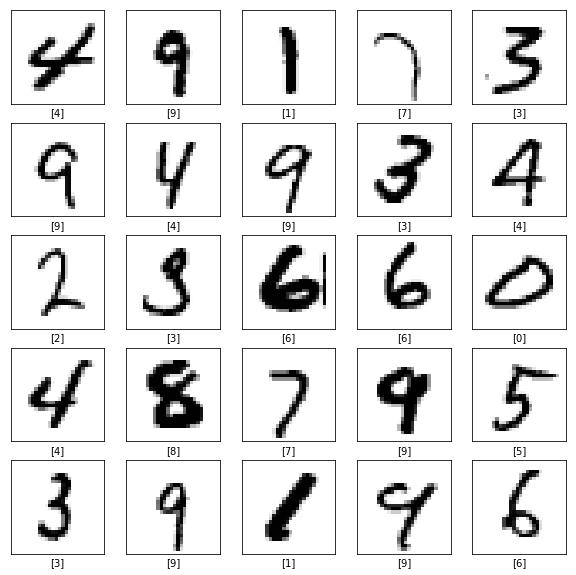

In [92]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap= plt.cm.binary)
    plt.xlabel([train_y[i]])
plt.show()

In [106]:
batch_size = 128
max_epochs  = 5

In [95]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(500 , activation = 'relu'),
                             tf.keras.layers.Dense(500,activation = 'relu'),
                             tf.keras.layers.Dense(10,activation = 'softmax')
                             ])

W0831 10:17:42.162358 17432 deprecation.py:506] From F:\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [96]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [107]:
model.fit(train_x, 
          train_y,
          batch_size=128,
          epochs = max_epochs,
          validation_data = (val_x,val_y),
          verbose = 2)

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 - 4s - loss: 0.0198 - acc: 0.9934 - val_loss: 0.1252 - val_acc: 0.9712
Epoch 2/5
34300/34300 - 4s - loss: 0.0078 - acc: 0.9977 - val_loss: 0.1228 - val_acc: 0.9747
Epoch 3/5
34300/34300 - 4s - loss: 0.0084 - acc: 0.9972 - val_loss: 0.1277 - val_acc: 0.9736
Epoch 4/5
34300/34300 - 3s - loss: 0.0134 - acc: 0.9956 - val_loss: 0.1394 - val_acc: 0.9719
Epoch 5/5
34300/34300 - 3s - loss: 0.0074 - acc: 0.9977 - val_loss: 0.1236 - val_acc: 0.9755


In [110]:
predictions = model.predict(test_x)

array([[2.34143730e-23, 2.09671359e-16, 5.04544052e-14, ...,
        1.48446336e-16, 1.22166397e-16, 2.17318034e-15],
       [1.00000000e+00, 2.41775600e-10, 8.24489010e-09, ...,
        7.14803550e-10, 3.41017135e-08, 8.85804485e-11],
       [7.34774148e-05, 1.37643340e-07, 1.13150335e-07, ...,
        1.55774207e-04, 8.74780071e-08, 9.52435911e-01],
       ...,
       [6.97582481e-09, 8.95342064e-11, 3.31160689e-11, ...,
        2.10899793e-13, 6.09849593e-08, 3.00086240e-15],
       [3.75957327e-17, 9.78322459e-17, 1.45096413e-12, ...,
        5.20352754e-17, 7.24473243e-14, 3.23033649e-19],
       [6.98021958e-16, 5.78599252e-11, 1.00000000e+00, ...,
        1.85456996e-15, 7.13178078e-16, 7.58443506e-19]], dtype=float32)